<a href="https://colab.research.google.com/github/K37VIN/Paris-Olympics2024/blob/main/Olympics_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir ~/.kaggle

!cp /content/drive/MyDrive/KaggleAPI/kaggle.json ~/.kaggle/kaggle.json

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d arjunprasadsarkhel/2021-olympics-in-tokyo

In [ ]:
! unzip 2021-olympics-in-tokyo.zip

In [ ]:
!pip install openpyxl

### Importing the Libraries :

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [40]:
athletes = pd.read_excel("/content/Athletes.xlsx")
coaches = pd.read_excel("/content/Coaches.xlsx")
entries_gender = pd.read_excel("/content/EntriesGender.xlsx")
medals = pd.read_excel("/content/Medals.xlsx")
teams = pd.read_excel("/content/Teams.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [41]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [42]:
coaches.head(10)

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
5,AIKMAN Siegfried Gottlieb,Japan,Hockey,Men
6,AL SAADI Kais,Germany,Hockey,Men
7,ALAMEDA Lonni,Canada,Baseball/Softball,Softball
8,ALEKNO Vladimir,Islamic Republic of Iran,Volleyball,Men
9,ALEKSEEV Alexey,ROC,Handball,Women


In [43]:
coaches['Event'].unique()

array([nan, 'Men', 'Softball', 'Women', 'Duet', 'Team', 'Baseball'],
      dtype=object)

In [44]:

coaches['Event'].value_counts()

Event
Men         94
Women       88
Duet        27
Softball    20
Team        14
Baseball     6
Name: count, dtype: int64

In [ ]:
coaches['Event'].isnull().sum()

### Exploring the Data:

In [ ]:
print(athletes.head())
print()
print("Number of rows and columns are :",athletes.shape)
print()
print(athletes.info())
print()
print(athletes.nunique())
print()
print(athletes.duplicated().sum())
print()
print(athletes.isnull().sum())

                Name     NOC           Discipline
0    AALERUD Katrine  Norway         Cycling Road
1        ABAD Nestor   Spain  Artistic Gymnastics
2  ABAGNALE Giovanni   Italy               Rowing
3     ABALDE Alberto   Spain           Basketball
4      ABALDE Tamara   Spain           Basketball

Number of rows and columns are : (11085, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB
None

Name          11062
NOC             206
Discipline       46
dtype: int64

1

Name          0
NOC           0
Discipline    0
dtype: int64


In [ ]:
print(entries_gender.head())
print()
print("Number of rows and columns are :", entries_gender.shape)
print()
print(entries_gender.info())
print()
print(entries_gender.nunique())
print()
print(entries_gender.duplicated().sum())
print()
print(entries_gender.isnull().sum())

            Discipline  Female  Male  Total
0       3x3 Basketball      32    32     64
1              Archery      64    64    128
2  Artistic Gymnastics      98    98    196
3    Artistic Swimming     105     0    105
4            Athletics     969  1072   2041

Number of rows and columns are : (46, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB
None

Discipline    46
Female        38
Male          41
Total         41
dtype: int64

0

Discipline    0
Female        0
Male          0
Total         0
dtype: int64


In [ ]:
print(medals.head())
print()
print("Number of rows and columns are :",medals.shape)
print()
print(medals.info())
print()
print(medals.nunique())
print()
print(medals.duplicated().sum())
print()
print(medals.isnull().sum())

   Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0     1    United States of America    39      41      33    113   
1     2  People's Republic of China    38      32      18     88   
2     3                       Japan    27      14      17     58   
3     4               Great Britain    22      21      22     65   
4     5                         ROC    20      28      23     71   

   Rank by Total  
0              1  
1              2  
2              5  
3              4  
4              3  

Number of rows and columns are : (93, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null

In [ ]:
print(coaches.head())
print()
print("Number of rows and columns are :", coaches.shape)
print()
print(coaches.info())
print()
print(coaches.nunique())
print()
print(coaches.duplicated().sum())
print()
print(coaches.isnull().sum())

              Name            NOC  Discipline Event
0  ABDELMAGID Wael          Egypt    Football   NaN
1        ABE Junya          Japan  Volleyball   NaN
2    ABE Katsuhiko          Japan  Basketball   NaN
3     ADAMA Cherif  Côte d'Ivoire    Football   NaN
4       AGEBA Yuya          Japan  Volleyball   NaN

Number of rows and columns are : (394, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        394 non-null    object
 1   NOC         394 non-null    object
 2   Discipline  394 non-null    object
 3   Event       249 non-null    object
dtypes: object(4)
memory usage: 12.4+ KB
None

Name          381
NOC            61
Discipline      9
Event           6
dtype: int64

1

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64


In [ ]:
print(teams.head())
print()
print("Number of rows and columns are :",teams.shape)
print()
print(teams.info())
print()
print(teams.nunique())
print()
print(teams.duplicated().sum())
print()
print(teams.isnull().sum())

      Name      Discipline                         NOC  Event
0  Belgium  3x3 Basketball                     Belgium    Men
1    China  3x3 Basketball  People's Republic of China    Men
2    China  3x3 Basketball  People's Republic of China  Women
3   France  3x3 Basketball                      France  Women
4    Italy  3x3 Basketball                       Italy  Women

Number of rows and columns are : (743, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB
None

Name          146
Discipline     20
NOC            84
Event          36
dtype: int64

0

Name          0
Discipline    0
NOC           0
Event         0
dtype: int64


Duplicates exist in the athletes and coaches column.(So we have to drop them)

### Dropping the duplicates

In [ ]:
athletes.drop_duplicates(inplace=True)
coaches.drop_duplicates(inplace=True)

### Some Visualization

<ipython-input-38-7bed9b854957>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




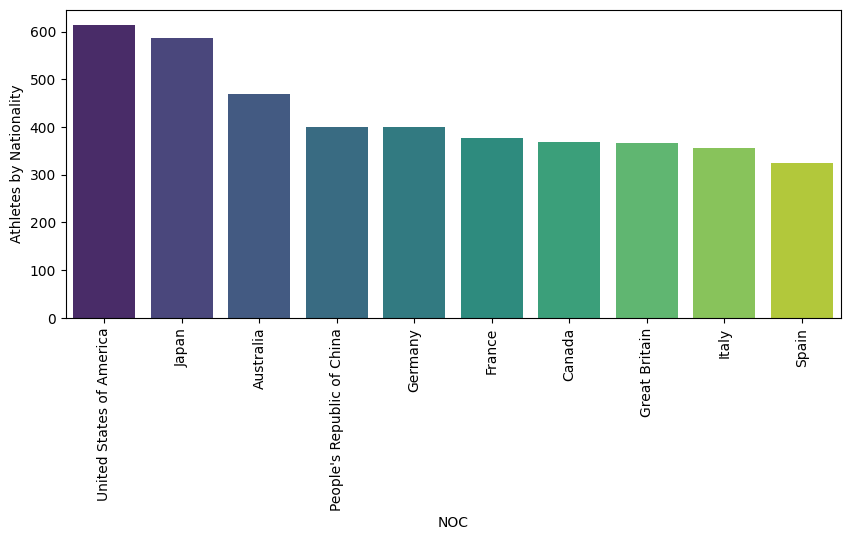

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='NOC',
                   data =athletes,
                   order=athletes['NOC'].value_counts(ascending=False).iloc[:10].index,
                   palette="viridis")
plt.xticks(rotation=90)
plt.ylabel('Athletes by Nationality')
plt.show()

Insights:

- USA,Japan and Australia are the top three countries producing the maximum athletes.

<ipython-input-20-4d790113b66b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Discipline',


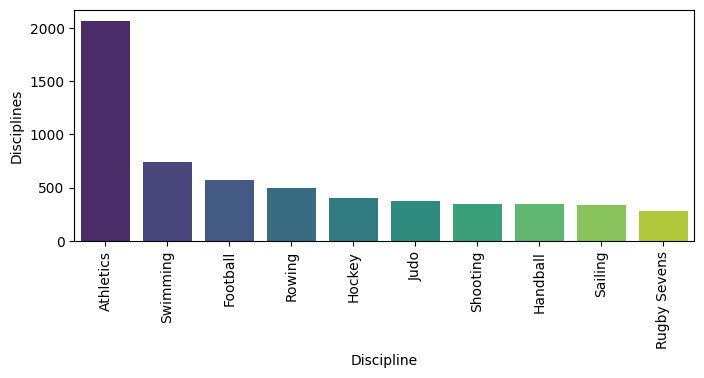

In [ ]:
plt.figure(figsize=(8,3))
ax = sns.countplot(x='Discipline',
                   data =athletes,
                   order=athletes['Discipline'].value_counts(ascending=False).iloc[:10].index,
                   palette="viridis")
plt.xticks(rotation=90)
plt.ylabel('Disciplines')
plt.show()

Insights:

- Athletics recieved the highest number of participations in the Olympics,followed by swimming and other sports

<ipython-input-21-80ae33ffbcd3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team/NOC',


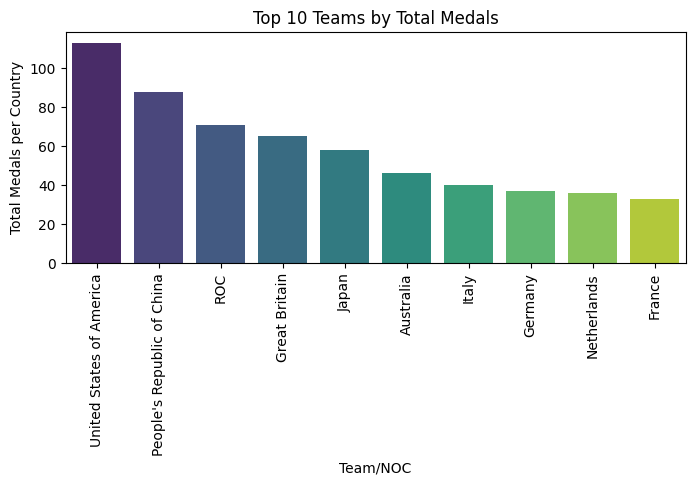

In [ ]:
plt.figure(figsize=(8,3))
ax = sns.barplot(x='Team/NOC',
                   y='Total',
                   data= medals.sort_values(by='Total', ascending=False).head(10),
                   palette="viridis")
plt.xticks(rotation=90)
plt.title('Top 10 Teams by Total Medals')
plt.ylabel('Total Medals per Country')
plt.show()

<ipython-input-27-475ff24fe4eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team/NOC',


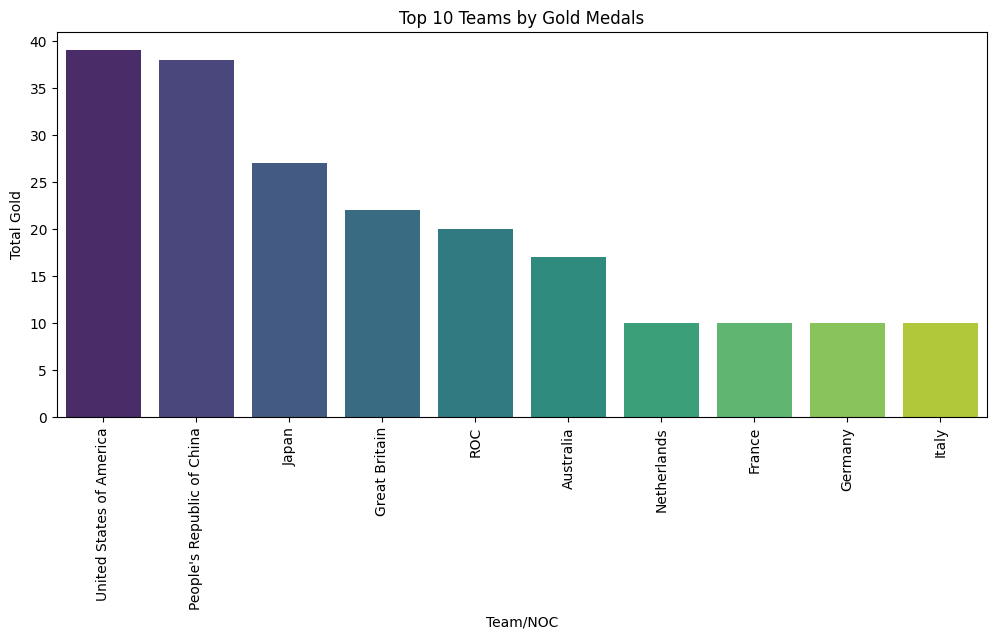

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Team/NOC',
                   y='Gold',
                   data= medals.sort_values(by='Gold', ascending=False).head(10),
                   palette="viridis")
plt.xticks(rotation=90)
plt.title('Top 10 Teams by Gold Medals')
plt.ylabel('Total Gold')
plt.show()

<ipython-input-28-6c106a2dd2ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team/NOC',


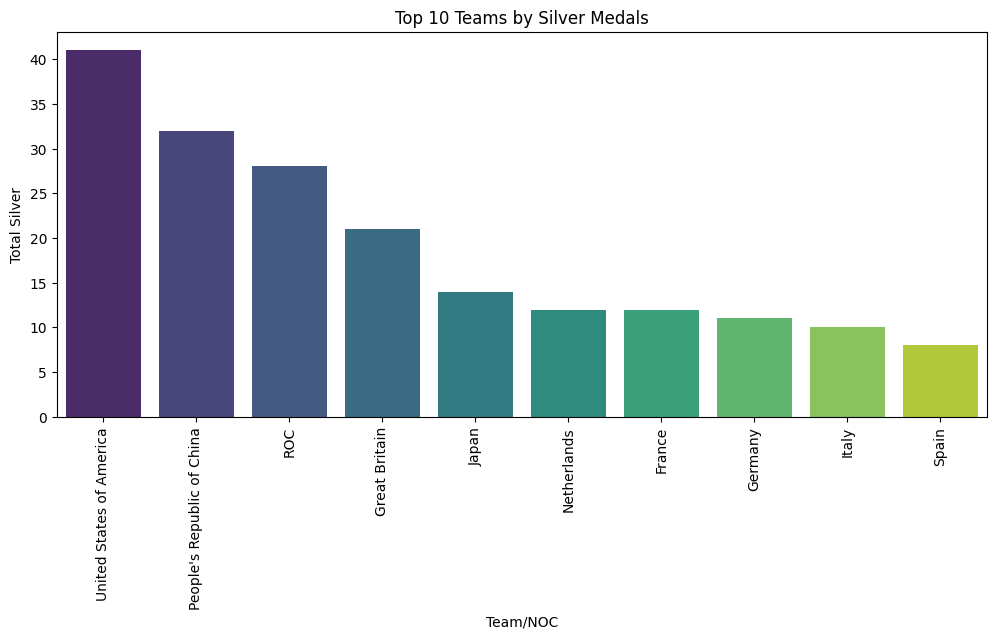

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Team/NOC',
                   y='Silver',
                   data= medals.sort_values(by='Silver', ascending=False).head(10),
                   palette="viridis")
plt.xticks(rotation=90)
plt.title('Top 10 Teams by Silver Medals')
plt.ylabel('Total Silver')
plt.show()

<ipython-input-29-bf19b9dfad0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team/NOC',


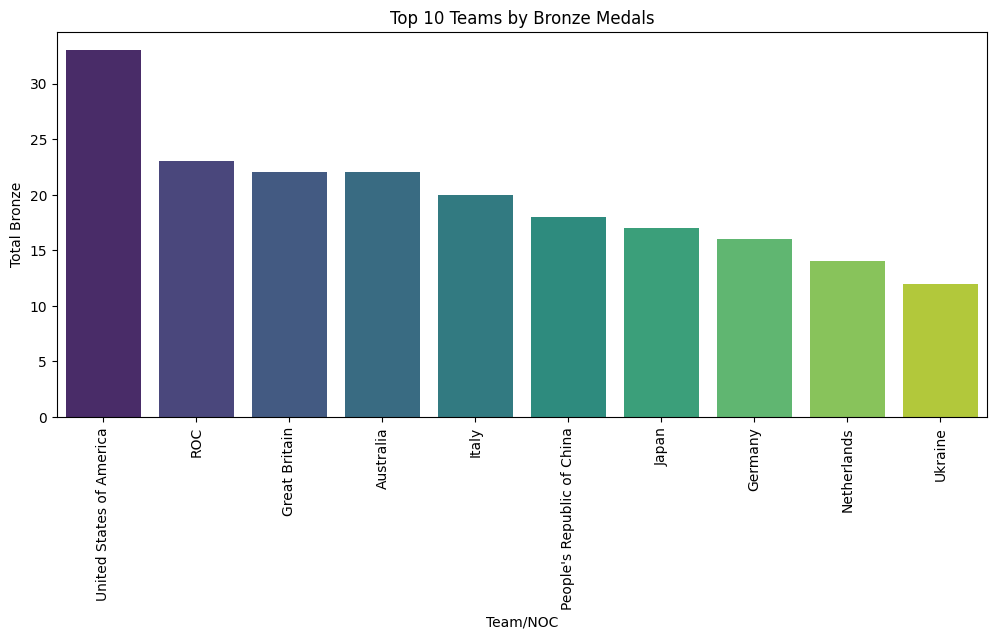

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Team/NOC',
                   y='Bronze',
                   data= medals.sort_values(by='Bronze', ascending=False).head(10),
                   palette="viridis")
plt.xticks(rotation=90)
plt.title('Top 10 Teams by Bronze Medals')
plt.ylabel('Total Bronze')
plt.show()

Insights:

- In terms of total medals,USA leads the race,followed by China and ROC
- If we specifically talk about Gold medals,China gives a tough competition to USA.
- Great Britain has more bronze medals compared to ROC

In [ ]:
px.choropleth(medals, locations="Team/NOC",
                    locationmode='country names', color="Team/NOC",
                    hover_name="Total", range_color=[1,100],
                    color_continuous_scale="blues",
                    title='Density of Countries in 2020')

- This above graph shows the total medal count for different countries of the world visually.

In [ ]:
px.scatter(medals, x="Total", y="Rank",size="Total", color="Team/NOC",hover_name="Team/NOC", log_x=True, size_max=60)

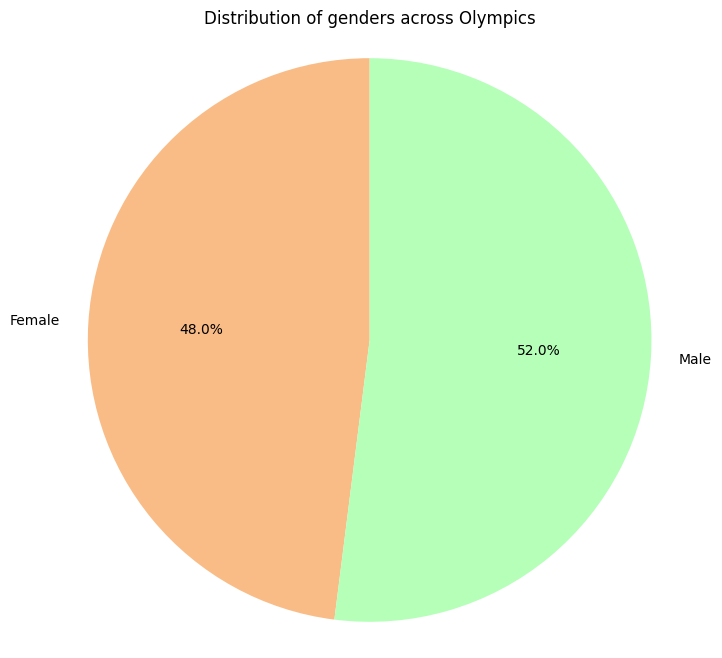

In [ ]:
labels = ['Female', 'Male']
sizes = [entries_gender['Female'].sum(), entries_gender['Male'].sum()]
colors = ['#f9bc86', '#b5ffb9']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of genders across Olympics")
plt.axis('equal')
plt.show()

Percentage of participation of Male athletes is more as compared to Female athletes

### Conditional Probability:
- P(A) : Probability of wining at least one silver.
- P(A,B) : Probability of winning at least both silver and gold.
- P(B|A) : Probability of winning a gold medal after winning silver

So, the formula looks like -->

P(B|A) = P(A) / P(A,B)

In [ ]:
#P(A)
PA=medals[medals['Silver']>0]['Silver'].count()/medals['Silver'].sum()
#P(A,B)
PAB=medals[(medals['Silver']>0) & (medals['Gold']>0)]['Gold'].count()\
    /medals[(medals['Silver']>0) & (medals['Gold']>0)]['Gold'].sum()
#P(B|A) = PAB/PA
PBA = PAB/PA
print('The probability of winning a gold medal after winning at least one silver is: ' + str(round(PBA,2)*100) +'%')

The probability of winning a gold medal after winning at least one silver is: 80.0%


# **Prediction for 2024**

To predict for 2024, we can
Determine medal efficiency: Medals won per athlete for each country.
<br>
Predict the number of athletes in 2024: Assume a similar or slightly higher number of athletes based on trends.
<br>
Estimate medal counts: Using medal efficiency, estimate potential medal counts for 2024.

Here we calculate MEDAL EFFICIENCY
<br>
MEDAL EFFICIENCY = TOTAL NUMBER OF MEDALS WON BY A COUNTRY / TOTAL NUMBER OF ATHLETES

In [ ]:
medals_by_nationality = medals.groupby('Team/NOC')['Total'].sum()
athletes_by_nationality = athletes.groupby('NOC')['Name'].count()

medal_efficiency = medals_by_nationality / athletes_by_nationality

print(medal_efficiency['United States of America'])


0.183739837398374


This is the countries with the highest Medal Efficiency

In [ ]:
medal_efficiency_sorted = medal_efficiency.sort_values(ascending=False)

print(medal_efficiency_sorted.head(10))


San Marino                    0.750000
Bermuda                       0.500000
Armenia                       0.250000
Georgia                       0.228571
ROC                           0.223270
Philippines                   0.222222
People's Republic of China    0.219451
Cuba                          0.217391
Qatar                         0.214286
Kosovo                        0.200000
dtype: float64


We assume the number of participants for 2024. We do this by assuming that there will be a 5 percent growth in number of participants for each country.

In [ ]:
athletes_2024 = athletes_by_nationality + (athletes_by_nationality * 0.05)
print(athletes_2024['United States of America'])
athletes_2024_array = np.array(athletes_2024)
print(athletes_2024_array)

645.75
[  5.25   8.4   43.05   5.25   2.1   21.     6.3  189.    16.8    3.15
 493.5   75.6   43.05  16.8   31.5    6.3    7.35 109.2  131.25   3.15
   7.35   2.1    3.15   5.25   7.35  13.65 305.55   2.1   43.05   7.35
   6.3    3.15  11.55 386.4    6.3    5.25   2.1    3.15  58.8   70.35
  67.2    3.15   3.15   6.3   13.65  59.85  72.45  14.7  122.85  30.45
   3.15   7.35 108.15   4.2    2.1   64.05  48.3  139.65   5.25   3.15
  13.65  34.65   4.2   44.1    3.15  29.4   47.25 395.85   5.25   3.15
  36.75 420.    14.7  384.3   78.75   6.3    5.25  23.1    5.25   4.2
   7.35   6.3   26.25  42.   162.75   4.2  122.85  27.3    4.2  121.8
  69.3   89.25 373.8   63.   615.3   11.55  96.6   81.9    3.15  10.5
  10.5   16.8    4.2   30.45   6.3    2.1    3.15   4.2    5.25  38.85
  11.55   6.3    5.25  30.45   4.2    4.2    6.3    2.1    2.1    7.35
 162.75   6.3   45.15  36.75  50.4    8.4    2.1   11.55   2.1    5.25
 287.7  212.1    8.4    7.35  61.95   8.4   96.6    5.25  10.5    3.15
  

We then calculate number of medals for 2024

In [ ]:
predicted_medals_2024 = medal_efficiency * athletes_2024
print(predicted_medals_2024)

Afghanistan               NaN
Albania                   NaN
Algeria                   NaN
American Samoa            NaN
Andorra                   NaN
                           ..
Virgin Islands, British   NaN
Virgin Islands, US        NaN
Yemen                     NaN
Zambia                    NaN
Zimbabwe                  NaN
Length: 206, dtype: float64


The coutries with the most number of medals are:

In [ ]:
predicted_medals_2024_sorted = predicted_medals_2024.sort_values(ascending=False)
predicted_medals_2024_rounded = predicted_medals_2024_sorted.apply(np.ceil)
print(predicted_medals_2024_rounded.head(10))

United States of America      119.0
People's Republic of China     93.0
ROC                            75.0
Great Britain                  69.0
Japan                          61.0
Australia                      49.0
Italy                          42.0
Germany                        39.0
Netherlands                    38.0
France                         35.0
dtype: float64


### Conclusions:

- As per 2021 Olympics data,Male participation is expected to be more as compared to Female in 2024 Olympics as well.
- As per 2021 Olympics dataset,we can assume that maximum athletes will be sent from USA,Japan and Australia.
- According to the predictions,USA is again going to be the table topper in the upcoming 2024 Paris Olympics,followed by China and ROC.
- USA is predicted to win around 119 medals in the 2024 Olympics,followed by China with around 93 medals and ROC with around 75 medals.
- We have assumed the number of participants for 2024,by considering that there will be a 5 percent growth in number of participants for each country,and doing the calculations according to that.
- As per 2021 Olympics data,Male participation is expected to be more as compared to Female in 2024 Olympics as well.
- As per 2021 Olympics dataset,we can assume that maximum athletes will be sent from USA,Japan and Australia.
- Overall,we can come to the conclusion that USA is likely to win the Paris 2024 Olympics.
